In [2]:
# !pip install geopandas
# !pip install contextily

In [3]:
# Visualizing Singapore
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as cx
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Patch, Rectangle

In [4]:
lon = np.linspace(101.884552, 105.49786377, 160)[18:150]  # 150 has to be fixed
lat = np.linspace(0.23817444, 2.96469116, 120)[10:106]  # 10 has to be fixed
print(len(lat), 'x', len(lon))

96 x 132


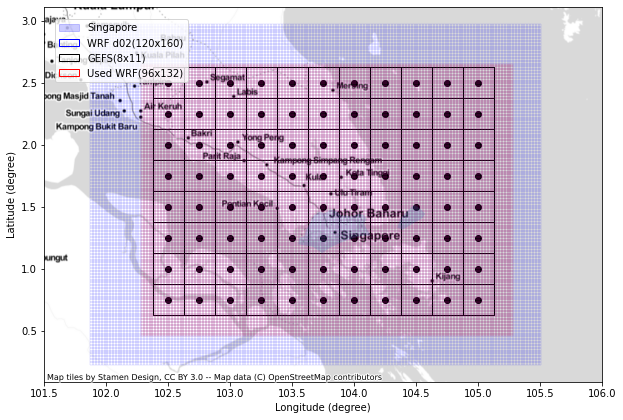

In [6]:
def plot_grid(ax, lon, lat, width, length, edgecolor, lw, point=False):
    
    boxes = [Rectangle((x - width/2, y - length/2), width, length)
                      for x, y in zip(lon.ravel(), lat.ravel())]
    data = PatchCollection(boxes, facecolor='none',edgecolor=edgecolor, lw=lw)
    # Add collection to axes
    ax.add_collection(data)
    if point==True:
        ax.scatter(lon.ravel(), lat.ravel(),color=edgecolor)


fig, ax = plt.subplots(figsize=(10,10))
# GEFS
lon_GEFS = np.linspace(102.5, 105, 11)
lat_GEFS = np.linspace(0.75, 2.5, 8)
lon, lat = np.meshgrid(lon_GEFS, lat_GEFS)
GEFS_setting = {'lon':lon, 'lat':lat, 'ax':ax, 'width':0.25, 'length':0.25, 'edgecolor':'k', 'lw':1, 'point':True}
# WRF d02
# max lats 1.6522293 max lons 104.17087 min lats 1.1069946 min lons 103.44849 d03
# max lats 2.96469116 max lons 105.49786377 min lats 0.23817444 min lons 101.884552 d02
width = (105.49786377 - 101.884552)/(160-1)
length = (2.96469116 - 0.23817444)/(120-1)
lon = np.linspace(101.884552, 105.49786377, 160)
lat = np.linspace(0.23817444, 2.96469116, 120)
lon, lat = np.meshgrid(lon, lat)
WRF_setting = {'lon':lon, 'lat':lat, 'ax':ax, 'width':width, 'length':length, 'edgecolor':'b', 'lw':0.1}
# 96/132 from 9/12
lon = np.linspace(101.884552, 105.49786377, 160)[18:150]  # 150 has to be fixed
lat = np.linspace(0.23817444, 2.96469116, 120)[10:106]  # 10 has to be fixed
lon, lat = np.meshgrid(lon, lat)
selected_WRF_setting = {'lon':lon, 'lat':lat, 'ax':ax, 'width':width, 'length':length, 'edgecolor':'r', 'lw':0.1}
for setting in [GEFS_setting, WRF_setting, selected_WRF_setting]:
    plot_grid(**setting)

# Plot
# get returning a full geometry data
location = lambda row: Nominatim(user_agent='google').geocode(row, geometry='geojson')
dic = location('Singapore').raw['geojson']
df = pd.DataFrame(dic)
df['coordinates'] = [Polygon(i[0]) for i in df['coordinates']]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry='coordinates')
gdf.plot(ax=ax, alpha=0.2)
cx.add_basemap(ax, crs=gdf.crs,source=cx.providers.Stamen.TonerLite)
# Add legend
legend_elements = [Patch(facecolor='blue', edgecolor='blue',alpha=0.2,
                         label='Singapore'),
                  Patch(facecolor='none', edgecolor='b',
                         label='WRF d02(120x160)'),
                  Patch(facecolor='none', edgecolor='k',
                         label='GEFS(8x11)'),
                  Patch(facecolor='none', edgecolor='r',
                         label='Used WRF(96x132)')]
ax.legend(handles=legend_elements,loc=(0.02,0.8),ncol=1)
plt.xlim(101.5,106)
# plt.ylim()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)');
plt.savefig('seleced_WRF.svg',dpi=400,bbox_inches='tight')

In [ ]:
# 96/2/2/3, 132/2/2/3